**Mount the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import necessary library**

In [ ]:
pip install hdbscan

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import hdbscan
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

**TASK 1**

**Read the csv file and create the data frame**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/EastWestAirlines.csv')
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


**shape of columns**

In [ ]:
df.shape

(3999, 12)

**Name of columns**

In [ ]:
df.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

**description of dataset**

In [ ]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


**Information about data set**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


**Findout missing values**

In [ ]:
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

**correlation table**

In [ ]:
df.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


**visualization of correlation columns**

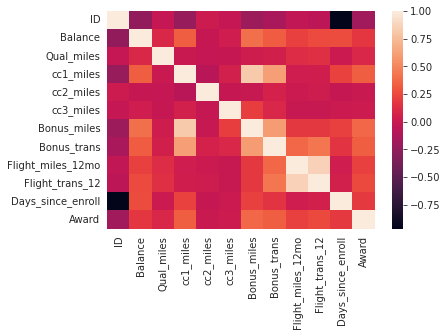

In [ ]:
sns.heatmap(df.corr())

**Z_standardization**

In [ ]:
df1 = df
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scale_columns =['Balance','Qual_miles','cc1_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']
df1[scale_columns] = std_scaler.fit_transform(df[scale_columns])
df1.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,-0.451141,-0.186299,-0.769578,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,2,-0.539457,-0.186299,-0.769578,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,3,-0.320031,-0.186299,-0.769578,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,4,-0.583799,-0.186299,-0.769578,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,5,0.239678,-0.186299,1.409471,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


**Visualization of scale columns**

In [ ]:
df2 = df
scale_columns1=['Balance','Bonus_miles','Days_since_enroll']
df2[scale_columns1] = std_scaler.fit_transform(df[scale_columns1])
df2.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,-0.451141,-0.186299,-0.769578,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,2,-0.539457,-0.186299,-0.769578,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,3,-0.320031,-0.186299,-0.769578,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,4,-0.583799,-0.186299,-0.769578,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,5,0.239678,-0.186299,1.409471,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


**TASK 2**

**Exploratory Data Analysis**

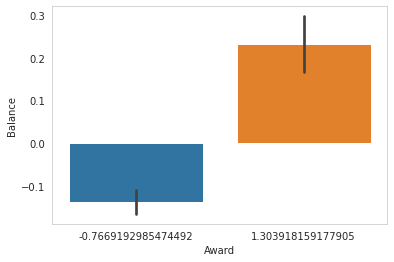

In [290]:
sns.barplot(x='Award', y='Balance', data= df1)
plt.show()

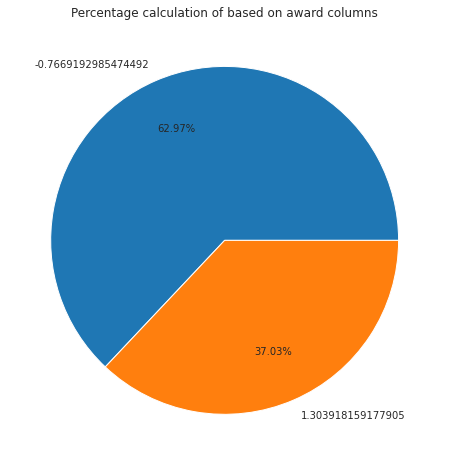

In [285]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
data=df1['Award'].value_counts()
labels=data.keys()
plt.pie(x=data,autopct="%0.2f%%",labels=labels,pctdistance=0.7)
plt.title("Percentage calculation of based on award columns")
plt.show()

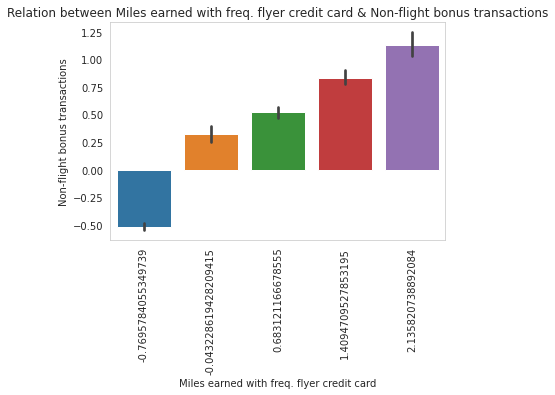

In [286]:
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= df1)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.title('Relation between Miles earned with freq. flyer credit card & Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


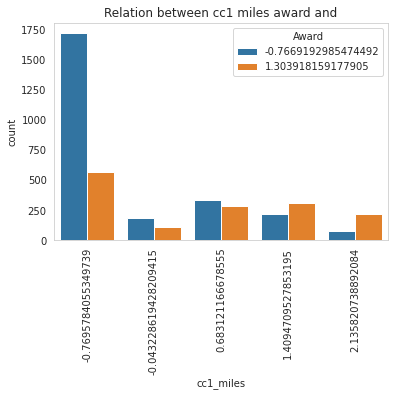

In [295]:
sns.countplot(df1['cc1_miles'],hue=df1['Award'])
plt.title('Relation between cc1 miles award and')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.pairplot(df2[scale_columns1])
plt.show()

**Distribution plot for balance**

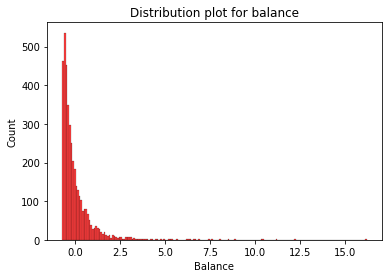

In [ ]:
sns.histplot(x = df1["Balance"], color = "r")
plt.title('Distribution plot for balance') 
plt.show()

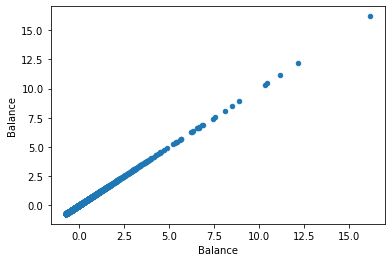

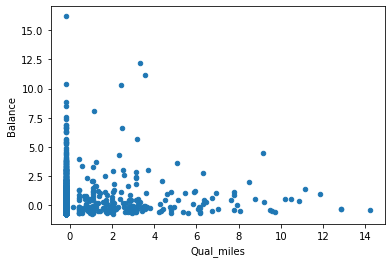

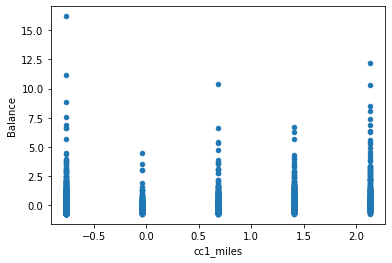

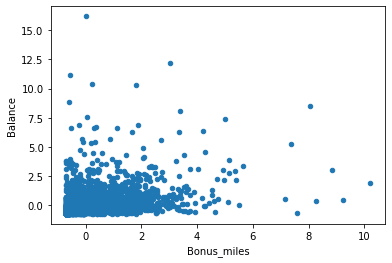

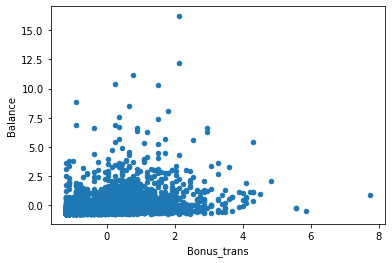

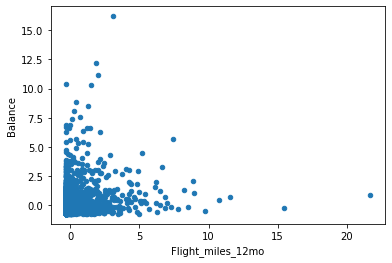

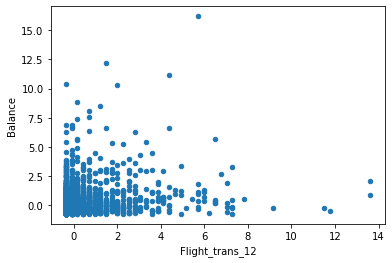

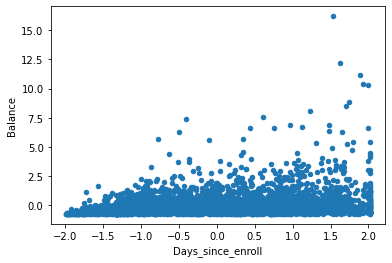

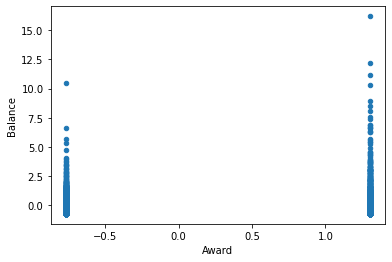

In [ ]:
for X in scale_columns:
  df1.plot.scatter(x=X ,y ='Balance')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = df1[scale_columns]
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)
print('Attributes used for cluster model: ', scale_columns)

[[ 0.43044088 -0.11596946  1.2234689   0.96701643  0.77228255 -0.08386217
  -0.09529833  0.37375011  0.58566984]
 [-0.29315379 -0.12998429 -0.59718075 -0.50796238 -0.4777636  -0.18779348
  -0.19935579 -0.19700552 -0.34690244]
 [ 0.45710365  6.73109194 -0.04322862  0.06371677  0.06535804  0.3596938
   0.39424679 -0.07122344  0.38731797]
 [ 1.21420409  0.41186869  0.09735521  0.62974905  1.68281235  3.61438829
   3.88198067  0.2922843   0.88975067]]
[1 1 1 ... 0 1 1]
Attributes used for cluster model:  ['Balance', 'Qual_miles', 'cc1_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award']


**Elbow method**

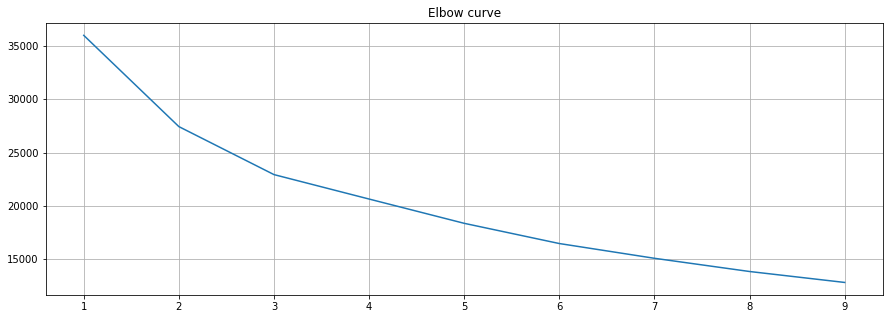

In [ ]:
distorsions = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df)
  distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve');

**#silhoutte score**

For n_clusters = 2 The average silhouette_score is : 0.3363941920693057
For n_clusters = 3 The average silhouette_score is : 0.3233450467665015
For n_clusters = 4 The average silhouette_score is : 0.33282105346834956
For n_clusters = 5 The average silhouette_score is : 0.2813621091829875
For n_clusters = 6 The average silhouette_score is : 0.2744212966192579
For n_clusters = 7 The average silhouette_score is : 0.2467750065106076
For n_clusters = 8 The average silhouette_score is : 0.2571829170657478
For n_clusters = 9 The average silhouette_score is : 0.26335679451649224
For n_clusters = 10 The average silhouette_score is : 0.27002698456158936
For n_clusters = 11 The average silhouette_score is : 0.26646099767197423
For n_clusters = 12 The average silhouette_score is : 0.26922044689846153


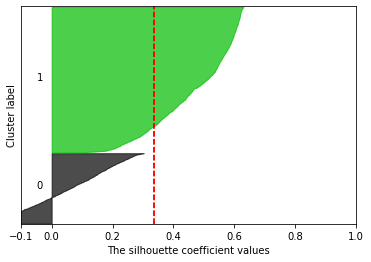

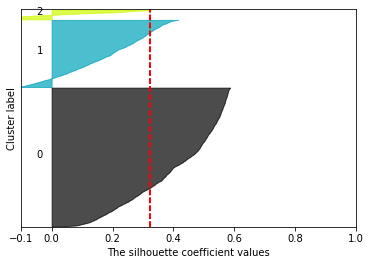

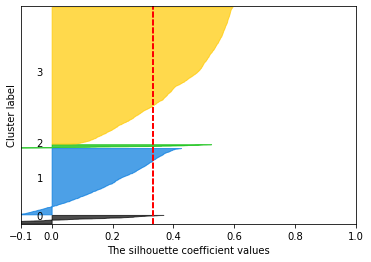

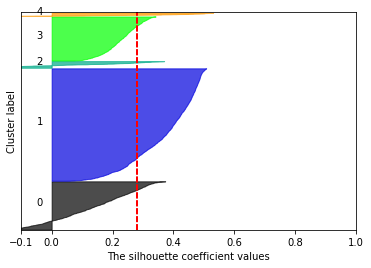

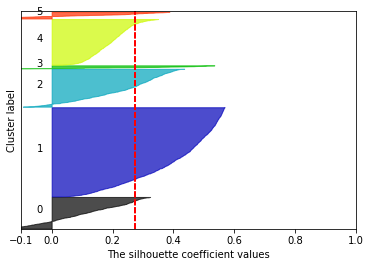

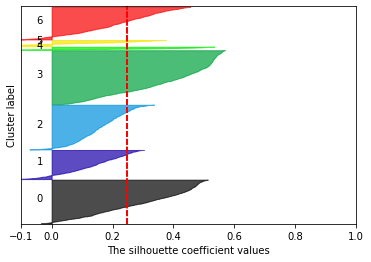

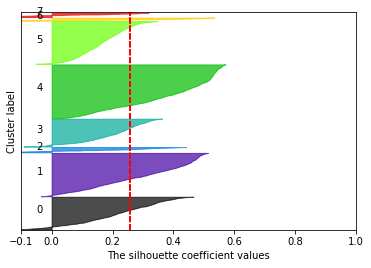

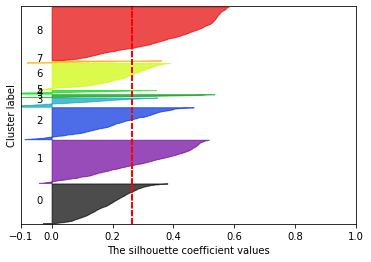

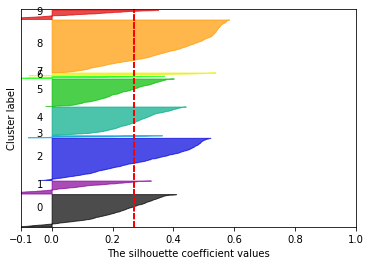

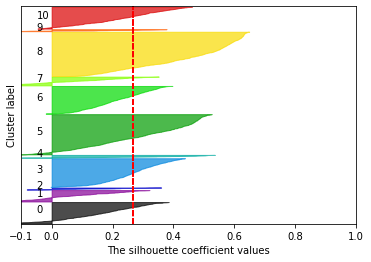

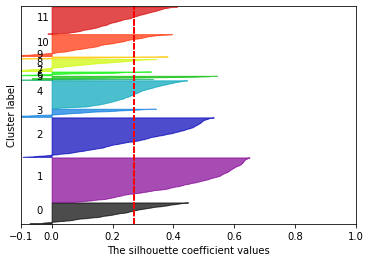

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12]
for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
  fig, ax1 = plt.subplots(1, 1)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(df)
  silhouette_avg = silhouette_score(df, cluster_labels)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(df, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
 # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

**# kMeans_clustering**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = df1[scale_columns]
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)
print('Attributes used for cluster model: ', scale_columns)

[[-0.29222318 -0.13013851 -0.59765289 -0.50794605 -0.47699352 -0.17994267
  -0.19340606 -0.1961325  -0.34481198]
 [ 0.43749358 -0.11207889  1.2115348   0.96007822  0.77427672 -0.07119451
  -0.07921597  0.37580014  0.58644955]
 [ 1.26664583  0.4453882   0.16730755  0.72526138  1.82614744  3.81563848
   4.1220399   0.27655025  0.92876645]
 [ 0.45710365  6.73109194 -0.04322862  0.06371677  0.06535804  0.3596938
   0.39424679 -0.07122344  0.38731797]]
[0 0 0 ... 1 0 0]
Attributes used for cluster model:  ['Balance', 'Qual_miles', 'cc1_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award']


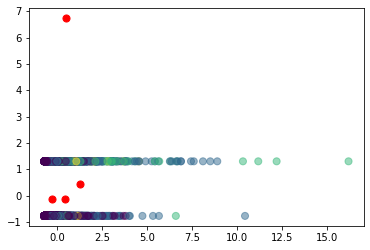

In [ ]:
plt.scatter(df1['Balance'], df1['Award'], c= kmeans.labels_.astype(int), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

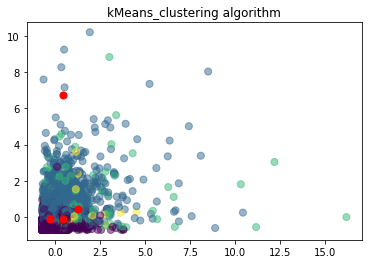

In [ ]:
plt.scatter(df1['Balance'], df1['Bonus_miles'], c= kmeans.labels_.astype(int), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title("kMeans_clustering algorithm")
plt.show()

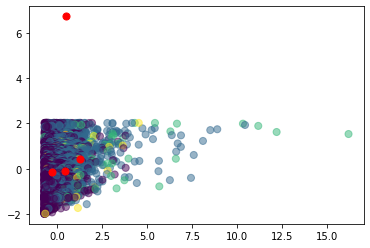

In [ ]:
plt.scatter(df1['Balance'], df1['Days_since_enroll'], c= kmeans.labels_.astype(int), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
clustered_df = df1[scale_columns]
clustered_df['Balance'] = df1['Balance']
clustered_df['Cluster'] = kmeans.labels_
clustered_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
0,-0.451141,-0.186299,-0.769578,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,1


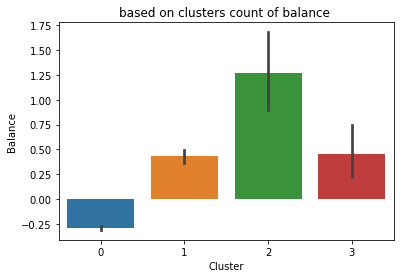

In [ ]:
sns.barplot(data=clustered_df,x='Cluster',y='Balance')
plt.title("based on clusters count of balance ")
plt.show()

**the K-means score, elbow curve shows a sharp drop at Cluster 4. For n_clusters =4 The average silhouette_score is : 0.34670106897008646. Elbow curve is sharp pole in the 2 of x axis values.so compare to other number of cluster n_clusters is give better silhoutte score.**

**Without feature reduction technique**

**DBSCAN algorithm**

In [ ]:
from sklearn.cluster import DBSCAN
df = df1[scale_columns] 
print(df) 

       Balance  Qual_miles  ...  Days_since_enroll     Award
0    -0.451141   -0.186299  ...           1.395454 -0.766919
1    -0.539457   -0.186299  ...           1.379957 -0.766919
2    -0.320031   -0.186299  ...           1.411920 -0.766919
3    -0.583799   -0.186299  ...           1.372208 -0.766919
4     0.239678   -0.186299  ...           1.363975  1.303918
...        ...         ...  ...                ...       ...
3994 -0.547079   -0.186299  ...          -1.315120  1.303918
3995 -0.091465   -0.186299  ...          -1.318994  1.303918
3996 -0.000043   -0.186299  ...          -1.315604  1.303918
3997 -0.185607   -0.186299  ...          -1.316088 -0.766919
3998 -0.700508   -0.186299  ...          -1.317541 -0.766919

[3999 rows x 9 columns]


for eps= 0.9 & min_samples= 3
eps= 0.9 & min_samples= 3 cluster count=  0     2323
 1     1067
-1      566
 10       8
 2        8
 5        5
 8        4
 11       3
 9        3
 7        3
 6        3
 4        3
 3        3
dtype: int64


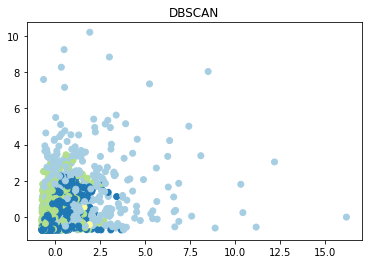

for eps= 0.9 & min_samples= 4
eps= 0.9 & min_samples= 4 cluster count=  0    2313
 1    1054
-1     604
 5       8
 6       6
 3       5
 2       5
 4       4
dtype: int64


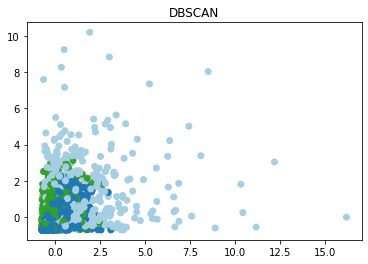

for eps= 0.9 & min_samples= 5
eps= 0.9 & min_samples= 5 cluster count=  0    2301
 1    1042
-1     638
 3       8
 4       5
 2       5
dtype: int64


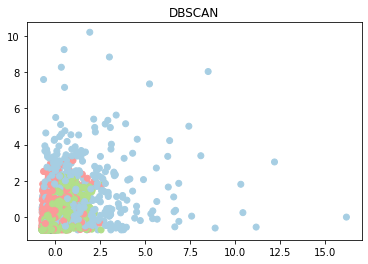

for eps= 1 & min_samples= 3
eps= 1 & min_samples= 3 cluster count=  0    2368
 1    1116
-1     487
 7      10
 5       5
 2       4
 6       3
 4       3
 3       3
dtype: int64


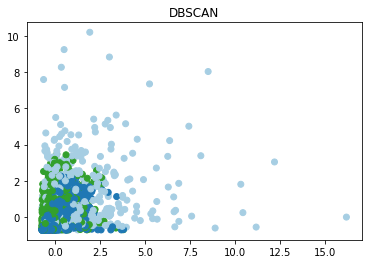

for eps= 1 & min_samples= 4
eps= 1 & min_samples= 4 cluster count=  0    2361
 1    1108
-1     509
 5       9
 4       5
 3       4
 2       3
dtype: int64


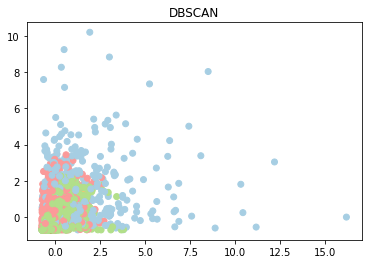

for eps= 1 & min_samples= 5
eps= 1 & min_samples= 5 cluster count=  0    2349
 1    1103
-1     533
 3       9
 2       5
dtype: int64


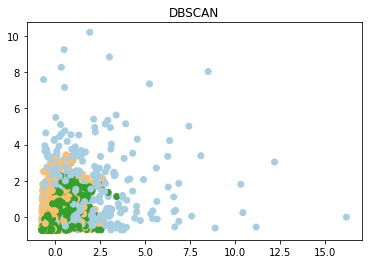

for eps= 1.3 & min_samples= 3
eps= 1.3 & min_samples= 3 cluster count=  0    2423
 1    1231
-1     313
 3       8
 7       7
 2       7
 5       4
 6       3
 4       3
dtype: int64


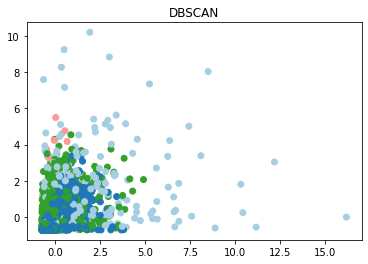

for eps= 1.3 & min_samples= 4
eps= 1.3 & min_samples= 4 cluster count=  0    2422
 1    1220
-1     333
 3       7
 2       7
 4       6
 5       4
dtype: int64


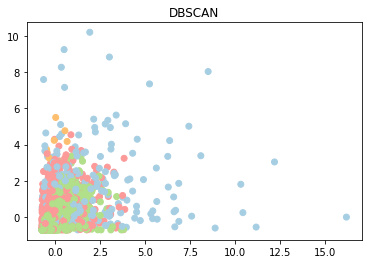

for eps= 1.3 & min_samples= 5
eps= 1.3 & min_samples= 5 cluster count=  0    2422
 1    1209
-1     357
 2       7
 3       4
dtype: int64


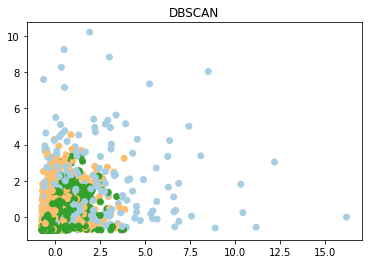

for eps= 1.4 & min_samples= 3
eps= 1.4 & min_samples= 3 cluster count=  0    2437
 1    1273
-1     279
 2       4
 4       3
 3       3
dtype: int64


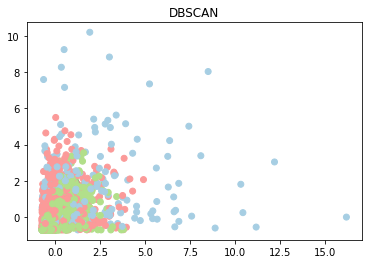

for eps= 1.4 & min_samples= 4
eps= 1.4 & min_samples= 4 cluster count=  0    2436
 1    1261
-1     297
 3       4
 2       1
dtype: int64


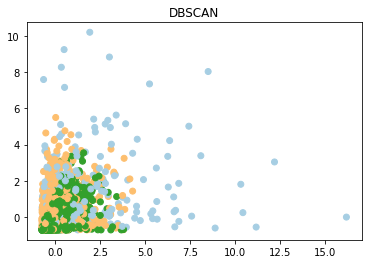

for eps= 1.4 & min_samples= 5
eps= 1.4 & min_samples= 5 cluster count=  0    2436
 1    1244
-1     315
 2       4
dtype: int64


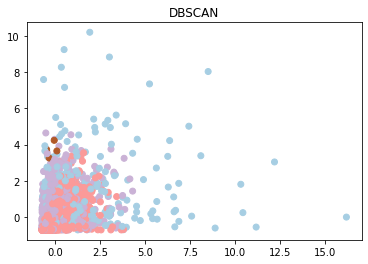

for eps= 1.5 & min_samples= 3
eps= 1.5 & min_samples= 3 cluster count=  0    2453
 1    1279
-1     250
 5       4
 4       4
 6       3
 3       3
 2       3
dtype: int64


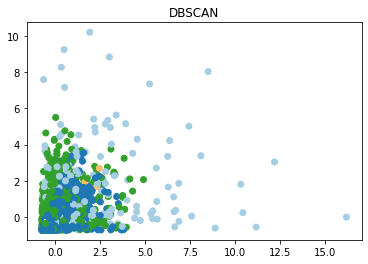

for eps= 1.5 & min_samples= 4
eps= 1.5 & min_samples= 4 cluster count=  0    2450
 1    1279
-1     266
 2       4
dtype: int64


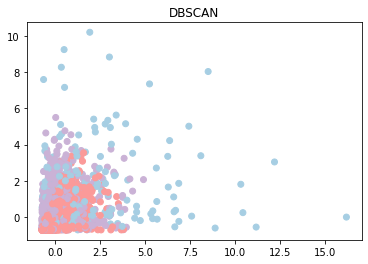

for eps= 1.5 & min_samples= 5
eps= 1.5 & min_samples= 5 cluster count=  0    2444
 1    1270
-1     285
dtype: int64


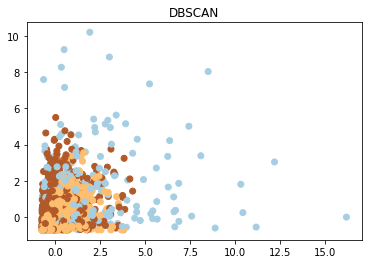

In [ ]:
eps= [0.9,1,1.3,1.4,1.5]
min_samples= [3,4,5]
for x in eps:
    for y in min_samples:
        dbscan =DBSCAN(eps=x, min_samples=y) 
        y_pred= dbscan.fit_predict(df)
        dt = pd.DataFrame(y_pred)
        print('for eps=',x,'&','min_samples=',y)
        print('eps=',x,'&','min_samples=',y,'cluster count=',dt.value_counts())
        plt.scatter(df1['Balance'],df1['Bonus_miles'],c=y_pred, cmap='Paired')  
        plt.title("DBSCAN")
        plt.show()

**#for eps= 0.9 & min_samples=3.DBSCAN model is giving us 12 clusters.For n_clusters = 12 The average silhouette_score is :0.26922044689846153.so higher the epsilon value lower the min samples its give better optimization for this data set. suppose if i reduce the epsilon value and higher the min samples i get only one cluster.**

In [ ]:
eps= 0.9
min_samples= 3
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df1['clusterid'] = dbscan.fit_predict(df1[scale_columns])
df1.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,1,-0.451141,-0.186299,-0.769578,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,2,-0.539457,-0.186299,-0.769578,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,3,-0.320031,-0.186299,-0.769578,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,4,-0.583799,-0.186299,-0.769578,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,5,0.239678,-0.186299,1.409471,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,1


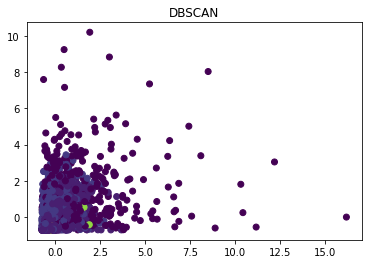

In [ ]:
y_pred=df1['clusterid'] 
plt.scatter(df1['Balance'],df1['Bonus_miles'],c=y_pred) 
plt.title("DBSCAN")
plt.show()

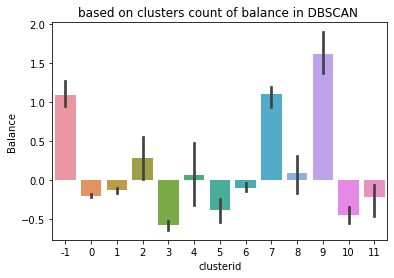

In [ ]:
sns.barplot(data=df1,x='clusterid',y='Balance')
plt.title("based on clusters count of balance in DBSCAN ")
plt.show()

In [ ]:
df1[df1['clusterid']==1]['Balance'].unique()

array([ 2.39677829e-01, -5.23458949e-01,  2.27470975e-01, ...,
       -5.47078715e-01, -9.14653367e-02, -4.29480975e-05])

In [ ]:
df1[df1['clusterid']==-1]['Balance'].unique()

array([ 3.66604247e+00,  3.10219550e-01,  1.11230909e+00, -5.26158351e-01,
        1.31049679e+00,  2.01432613e+00, -1.31876970e-01,  5.41658471e+00,
        2.13633512e+00,  3.42741388e-01,  4.45894265e-01,  2.13537298e-01,
        2.86851809e+00, -1.95382383e-01,  1.07258275e-01,  4.73155195e+00,
       -6.87368216e-01,  5.31817564e+00, -5.26912595e-01,  1.11099909e+00,
       -4.81578523e-01,  2.28513023e-01,  2.23603435e+00,  5.02135112e-01,
        2.20355221e+00,  8.89172715e+00,  1.30528655e+00,  5.24460701e+00,
        1.38491891e+00,  1.84475010e+00,  8.50320185e+00,  2.22819418e+00,
        1.45370403e+00,  7.87428143e-01,  3.26779138e+00,  2.95087962e+00,
        2.76794553e+00,  7.51105309e-01,  3.75208591e+00, -4.51706466e-01,
        6.28680438e+00,  3.34640154e+00,  4.95366758e-01,  6.89525205e-01,
        3.10093461e+00, -2.07053326e-01, -4.46396981e-01,  2.22181338e-01,
       -5.00355245e-01,  1.26777281e+00, -6.30234185e-01,  1.21914680e+01,
        1.54960227e+00,  

In [ ]:
df1[df1['clusterid']==0]['Balance'].unique()

array([-0.45114078, -0.53945687, -0.32003123, ..., -0.6910005 ,
       -0.18560698, -0.70050795])

In [ ]:
clustered_df = df1[['Balance']]
clustered_df['Bonus_miles'] = df1['Bonus_miles']
clustered_df['Cluster'] = df1['clusterid']
clustered_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Balance,Bonus_miles,Cluster
0,-0.451141,-0.702786,0
1,-0.539457,-0.701088,0
2,-0.320031,-0.539253,0
3,-0.583799,-0.689286,0
4,0.239678,1.083121,1


**for eps= 0.3 & min_samples=14.DBSCAN model is giving us 12 clusters.For n_clusters = 22 The average silhouette_score is : 0.3013635125298092 so lower the epsilon value higher the min samples its give better optimization for this data set. suppose if i reduce the epsilon value and higher the min samples i get only one cluster.**

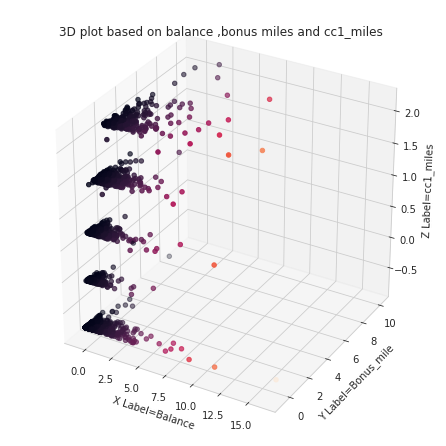

In [ ]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = df1['Balance']
y = df1['Bonus_miles']
z = df1['cc1_miles']

ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('X Label=Balance')
ax.set_ylabel('Y Label=Bonus_mile')
ax.set_zlabel('Z Label=cc1_miles')
plt.title("3D plot based on balance ,bonus miles and cc1_miles ")

plt.show()

**HDBSCAN**

In [ ]:
clusters=[]
outliers=[]
min_sample=[5,10,11,12,14]
for x in min_sample:
    clusterer_label = hdbscan.HDBSCAN(min_cluster_size=x).fit_predict(df1[scale_columns])
    a,b=np.unique(clusterer_label,return_counts=True)
    print('For:',x)
    clusters.append(len(a))
    print('no of clusters formed are',len(a))
    if (a[0]==-1):
        outliers.append(b[0])
        print('no of outliers is',b[0])

For: 5
no of clusters formed are 10
no of outliers is 585
For: 10
no of clusters formed are 6
no of outliers is 809
For: 11
no of clusters formed are 6
no of outliers is 833
For: 12
no of clusters formed are 6
no of outliers is 860
For: 14
no of clusters formed are 6
no of outliers is 910


**For min_sample_size: 6, for 6 min_samples no of clusters formed are 6 no of outliers is 833. HDBSCAN with this has the least amount of outliers. For n_clusters =6 The average silhouette_score is :0.3233450467665015.suppose if i reduce the number of cluster size the condensed plot giving clear nodes.**

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, gen_min_span_tree=True) 
clusterer.fit(df)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=6)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


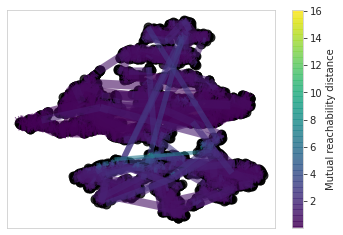

In [ ]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)

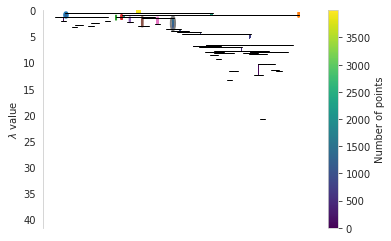

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [ ]:
min_cluster_size=6
df1['clusters'] = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size).fit_predict(df1[scale_columns])
df1.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid,clusters
0,1,-0.451141,-0.186299,-0.769578,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0,7
1,2,-0.539457,-0.186299,-0.769578,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0,7
2,3,-0.320031,-0.186299,-0.769578,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0,7
3,4,-0.583799,-0.186299,-0.769578,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0,7
4,5,0.239678,-0.186299,1.409471,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,1,0


**For min_sample_size: 6, for 10 min_samples
no of clusters formed are 6
no of outliers is . HDBSCAN with this has the least amount of outliers. For n_clusters =6 The average silhouette_score is :0.2744212966192579.**

**outlier Detection**

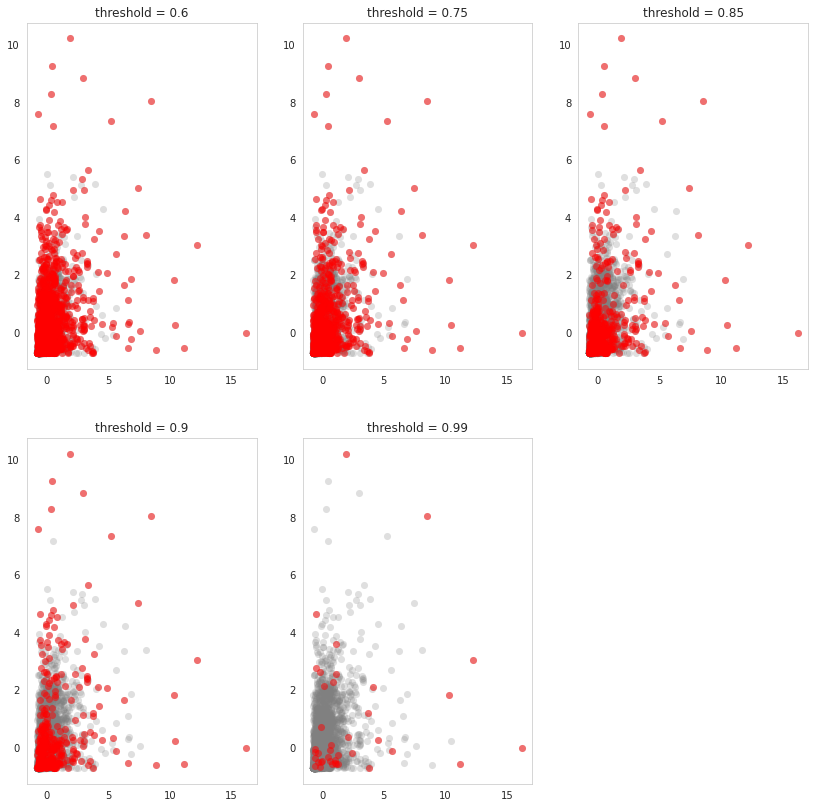

In [ ]:
c=1 
fig = plt.figure(figsize=(14,14)) 
for quant in [0.6,0.75, 0.85, 0.9,0.99]: 
  plt.subplot(2, 3, c) 
  plt.title('threshold = '+ str(quant)) 
  threshold = pd.Series(clusterer.outlier_scores_).quantile(quant) 
  outliers = np.where(clusterer.outlier_scores_ > threshold)[0] 
  plt.scatter(df1['Balance'],df1['Bonus_miles'], s=50, linewidth=0, c='gray', alpha=0.25) 
  plt.scatter(df1['Balance'].iloc[outliers],df1['Bonus_miles'].iloc[outliers], s=50, linewidth=0,c='red', alpha=0.5) 
  c=c +1

**with Feature reduction Technique**

In [ ]:
#PCA
components=3
values1 = PCA().fit_transform(df1[scale_columns])[:, :components]
values1

array([[-1.4639834 , -0.05889902,  0.91308776],
       [-1.4479663 , -0.05531974,  0.85281864],
       [-1.20737155, -0.12910049,  0.86989236],
       ...,
       [ 0.17595877, -0.61724289, -0.69650574],
       [-1.69295279,  0.76794969, -0.47590259],
       [-2.10968778,  0.44809714, -0.54688171]])

**Build the DBSCAN model**

for eps= 0.9 & min_samples= 3
eps= 0.9 & min_samples= 3 cluster count=  0    3871
-1      96
 2       8
 5       7
 4       6
 6       4
 1       4
 3       3
dtype: int64


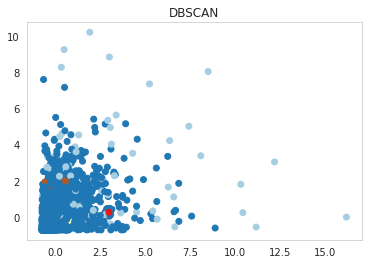

for eps= 0.9 & min_samples= 4
eps= 0.9 & min_samples= 4 cluster count=  0    3858
-1     111
 5       7
 3       6
 2       5
 1       5
 6       4
 4       3
dtype: int64


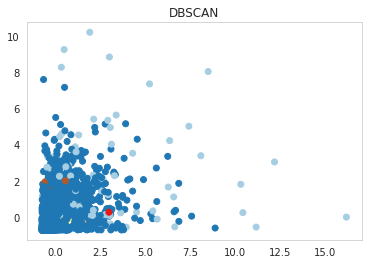

for eps= 0.9 & min_samples= 5
eps= 0.9 & min_samples= 5 cluster count=  0    3843
-1     130
 1       6
 5       5
 4       5
 3       5
 2       5
dtype: int64


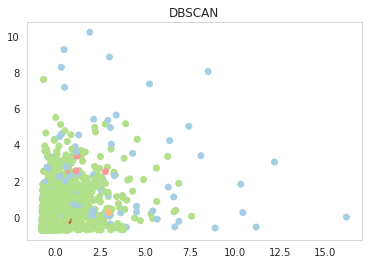

for eps= 1 & min_samples= 3
eps= 1 & min_samples= 3 cluster count=  0    3895
-1      81
 2       9
 3       7
 1       7
dtype: int64


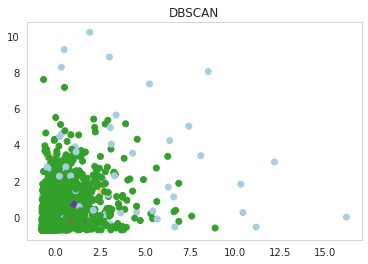

for eps= 1 & min_samples= 4
eps= 1 & min_samples= 4 cluster count=  0    3886
-1      95
 1       8
 3       7
 2       3
dtype: int64


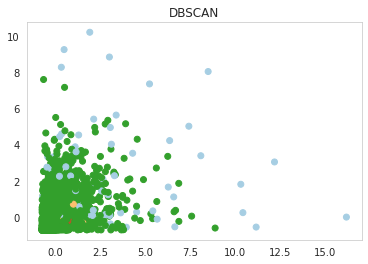

for eps= 1 & min_samples= 5
eps= 1 & min_samples= 5 cluster count=  0    3883
-1     102
 1       8
 2       6
dtype: int64


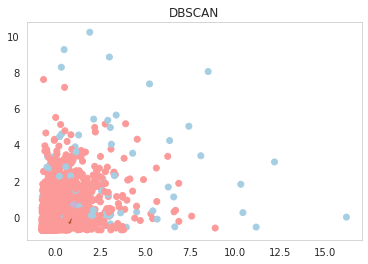

for eps= 1.3 & min_samples= 3
eps= 1.3 & min_samples= 3 cluster count=  0    3951
-1      35
 3       4
 4       3
 2       3
 1       3
dtype: int64


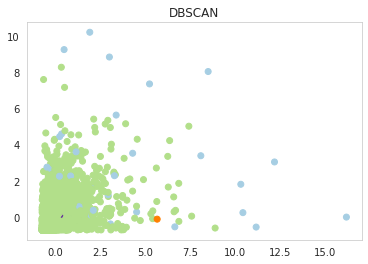

for eps= 1.3 & min_samples= 4
eps= 1.3 & min_samples= 4 cluster count=  0    3945
-1      54
dtype: int64


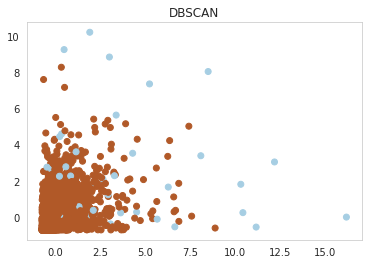

for eps= 1.3 & min_samples= 5
eps= 1.3 & min_samples= 5 cluster count=  0    3937
-1      62
dtype: int64


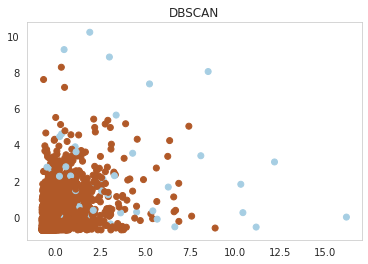

for eps= 1.4 & min_samples= 3
eps= 1.4 & min_samples= 3 cluster count=  0    3952
-1      33
 4       5
 3       3
 2       3
 1       3
dtype: int64


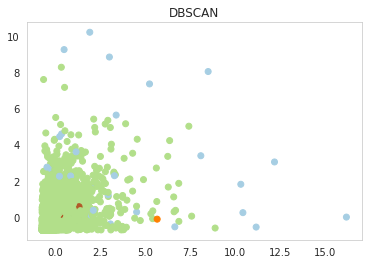

for eps= 1.4 & min_samples= 4
eps= 1.4 & min_samples= 4 cluster count=  0    3949
-1      46
 1       4
dtype: int64


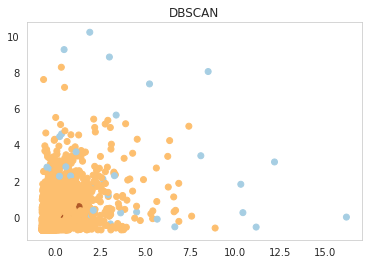

for eps= 1.4 & min_samples= 5
eps= 1.4 & min_samples= 5 cluster count=  0    3946
-1      53
dtype: int64


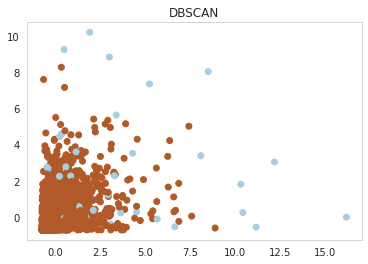

for eps= 1.5 & min_samples= 3
eps= 1.5 & min_samples= 3 cluster count=  0    3959
-1      29
 1       5
 3       3
 2       3
dtype: int64


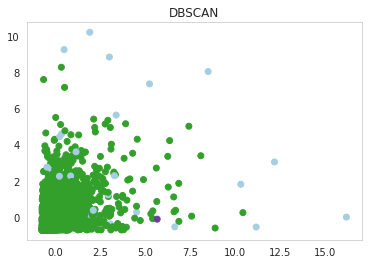

for eps= 1.5 & min_samples= 4
eps= 1.5 & min_samples= 4 cluster count=  0    3957
-1      38
 1       4
dtype: int64


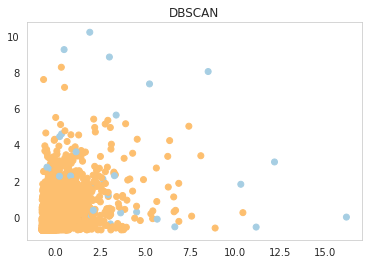

for eps= 1.5 & min_samples= 5
eps= 1.5 & min_samples= 5 cluster count=  0    3954
-1      45
dtype: int64


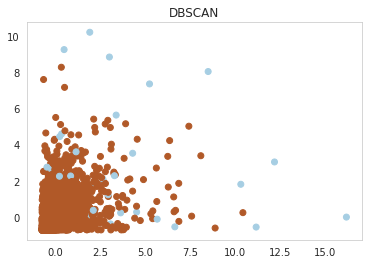

In [ ]:
eps= [0.9,1,1.3,1.4,1.5]
min_samples= [3,4,5]
for x in eps:
    for y in min_samples:
        dbscan =DBSCAN(eps=x, min_samples=y) 
        y_pred= dbscan.fit_predict(values1)
        dt = pd.DataFrame(y_pred)
        print('for eps=',x,'&','min_samples=',y)
        print('eps=',x,'&','min_samples=',y,'cluster count=',dt.value_counts())
        plt.scatter(df1['Balance'],df1['Bonus_miles'],c=y_pred, cmap='Paired')  
        plt.title("DBSCAN")
        plt.show()

In [ ]:
eps=0.9
min_samples=3
cluster3 = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(values1)

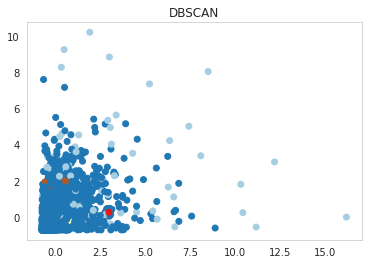

eps= 0.9 & min_samples= 3 cluster count=  0    3954
-1      45
dtype: int64


In [ ]:
plt.scatter(df1['Balance'],df1['Bonus_miles'],c=cluster3, cmap='Paired')
plt.title("DBSCAN")
plt.show()
print('eps=',eps,'&','min_samples=',min_samples,'cluster count=',dt.value_counts())

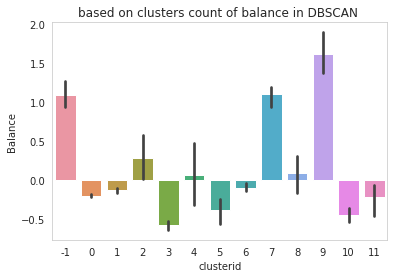

In [ ]:
sns.barplot(data=df1,x='clusterid',y='Balance')
plt.title("based on clusters count of balance in DBSCAN ")
plt.show()

**for eps= 0.9 & min_samples=3.DBSCAN model is giving us 8 clusters.For n_clusters =8 The average silhouette_score is : 0.2571829170657478.so higher the epsilon value lower the min samples its give better optimization for this data set. suppose if i reduce the epsilon value and higher the min samples i get only one cluster.**

**Build the HDBSCAN model**

In [ ]:
clusters=[]
outliers=[]
min_sample=[5,10,15,20,25,30]
for x in min_sample:
    clusterer_label = hdbscan.HDBSCAN(min_cluster_size=x).fit_predict(values1)
    a,b=np.unique(clusterer_label,return_counts=True)
    print('For:',x)
    clusters.append(len(a))
    print('no of clusters formed are',len(a))
    if (a[0]==-1):
        outliers.append(b[0])
        print('no of outliers is',b[0])

For: 5
no of clusters formed are 79
no of outliers is 2563
For: 10
no of clusters formed are 8
no of outliers is 2052
For: 15
no of clusters formed are 6
no of outliers is 2159
For: 20
no of clusters formed are 4
no of outliers is 2033
For: 25
no of clusters formed are 4
no of outliers is 1942
For: 30
no of clusters formed are 4
no of outliers is 2059


In [ ]:
clusters4 = hdbscan.HDBSCAN(min_cluster_size=4).fit_predict(values1)



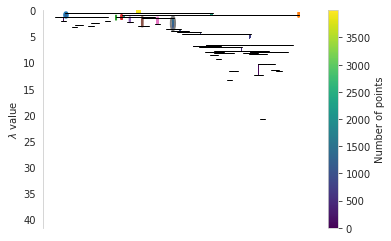

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

**For min_sample_size: 4, for 25 samples no of clusters formed are 6 no of outliers is 1942. HDBSCAN with this has the least amount of outliers. For n_clusters =4The average silhouette_score is :0.33282105346834956**

**CONCLUSION**

**compare the 2 feature reduction technique PCA i am getting more number of clusters. so t-sne technique is a best one**

**COMPARISION OF WITH AND WITHOUT REDUCTION TECHNIQUE RESULT**

**without reduction technique in DBSCAN**

**for eps= 0.9 & min_samples=3.DBSCAN model is giving us 12 clusters.For n_clusters = 12 The average silhouette_score is :0.26922044689846153.so higher the epsilon value lower the min samples its give better optimization for this data set. suppose if i reduce the epsilon value and higher the min samples i get only one cluster.**

**with reduction technique in DBSCAN**

**eps=0.9,min_samples=3. i am used PCA feature reduction or dimension reduction technique dbscan model For n_clusters =8 The average silhouette_score is : 0.2571829170657478.so higher the epsilon value lower the min samples its give better optimization for this data set. suppose if i reduce the epsilon value and higher the min samples i get only one cluster.**

**without reduction technique in HDBSCAN**

**For min_sample_size: 6, for 10 min_samples no of clusters formed are 6 no of outliers is . HDBSCAN with this has the least amount of outliers. For n_clusters =6 The average silhouette_score is :0.2744212966192579.suppose if i reduce the number of cluster size the condensed plot is messy.**

**with reduction technique in HDBSCAN**

**Final decision**

**From the above analysis based on silhuotte score and number of clusters size, i can conclude HDBSCAN with reduction technique(PRINCIPAL COMPONENT ANALYSIS) is a best model algorithm for this particular airline dataset.**

**Supervised learning**

**create the independent variable**

In [ ]:
x=df[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll']]

**create the independent variable**

In [ ]:
y=df['Award']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=1)

**KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y1_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('accuracy of the model is %:', accuracy_score(y_test, y1_pred)*100)

accuracy of the model is %: 72.57142857142857


**confusion matrix**

In [ ]:
from sklearn import metrics
cnf_matrix1=metrics.confusion_matrix(y_test,y1_pred)
cnf_matrix1
matrix1=metrics.classification_report(y_test,y1_pred)
matrix1

'              precision    recall  f1-score   support\n\n           0       0.74      0.85      0.79       864\n           1       0.68      0.53      0.60       536\n\n    accuracy                           0.73      1400\n   macro avg       0.71      0.69      0.69      1400\nweighted avg       0.72      0.73      0.72      1400\n'

Text(33.0, 0.5, 'actual outcomes')

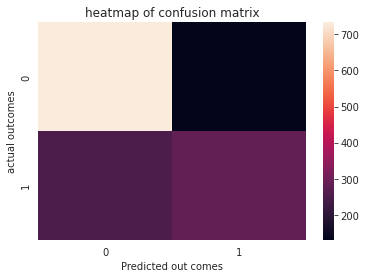

In [ ]:
sns.heatmap(cnf_matrix1)
plt.title("heatmap of confusion matrix")
plt.xlabel("Predicted out comes")
plt.ylabel("actual outcomes")

**measures of confusion matrix**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall', recall_score(y_test,y1_pred)*100)
print('f1', f1_score(y_test,y1_pred)*100)
print('accuracy', accuracy_score(y_test,y1_pred)*100)
print('precision', precision_score(y_test,y1_pred)*100)

recall 52.79850746268657
f1 59.57894736842106
accuracy 72.57142857142857
precision 68.35748792270532


**ROC AUC score(probablity predictions)**

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y1_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6881823521282477

In [ ]:
lr_probs = logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1 = lr_probs[:,1]
lr_1

[[0.67582937 0.32417063]
 [0.71385527 0.28614473]
 [0.65453423 0.34546577]
 ...
 [0.52988657 0.47011343]
 [0.7640337  0.2359663 ]
 [0.54032507 0.45967493]]


array([0.32417063, 0.28614473, 0.34546577, ..., 0.47011343, 0.2359663 ,
       0.45967493])

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,lr_1)
score

0.6790461753731344

**naive bayes algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y2_pred = gnb.predict(X_test)
from sklearn.metrics import accuracy_score
print('accuracy of the model is %:', accuracy_score(y_test, y2_pred)*100)

accuracy of the model is %: 68.0



**confusion matrix**

In [ ]:
from sklearn import metrics
cnf_matrix2=metrics.confusion_matrix(y_test,y2_pred)
matrix2=metrics.classification_report(y_test,y2_pred)
cnf_matrix2
matrix2

'              precision    recall  f1-score   support\n\n           0       0.68      0.90      0.78       864\n           1       0.67      0.32      0.43       536\n\n    accuracy                           0.68      1400\n   macro avg       0.68      0.61      0.61      1400\nweighted avg       0.68      0.68      0.65      1400\n'

Text(33.0, 0.5, 'actual outcomes')

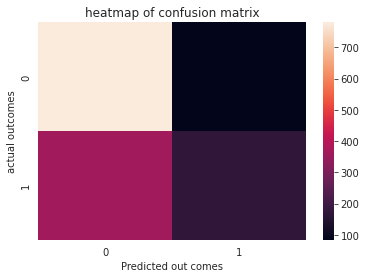

In [ ]:
sns.heatmap(cnf_matrix2)
plt.title("heatmap of confusion matrix")
plt.xlabel("Predicted out comes")
plt.ylabel("actual outcomes")

**measures of confusion matrix**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall', recall_score(y_test,y2_pred)*100)
print('f1', f1_score(y_test,y2_pred)*100)
print('accuracy', accuracy_score(y_test,y2_pred)*100)
print('precision', precision_score(y_test,y2_pred)*100)

recall 32.08955223880597
f1 43.43434343434344
accuracy 68.0
precision 67.1875


**ROC AUC score(probablity predictions)**

In [ ]:
lr_probs = logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1 = lr_probs[:,1]
lr_1

[[0.67582937 0.32417063]
 [0.71385527 0.28614473]
 [0.65453423 0.34546577]
 ...
 [0.52988657 0.47011343]
 [0.7640337  0.2359663 ]
 [0.54032507 0.45967493]]


array([0.32417063, 0.28614473, 0.34546577, ..., 0.47011343, 0.2359663 ,
       0.45967493])

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,lr_1)
score

0.6790461753731344

**logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train,y_train)
y3_pred=logistic_regression.predict(X_test)
from sklearn.metrics import accuracy_score
print('accuracy of the model is %:', accuracy_score(y_test, y3_pred)*100)

accuracy of the model is %: 69.92857142857143


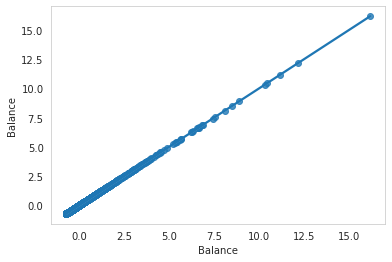

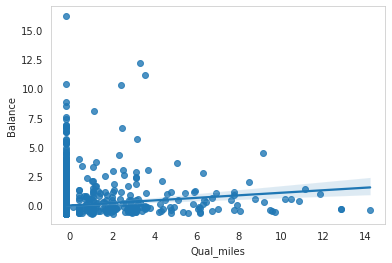

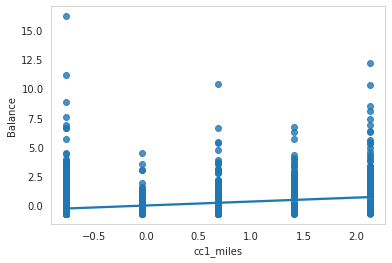

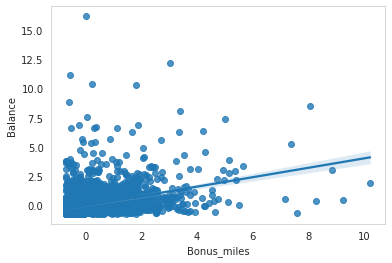

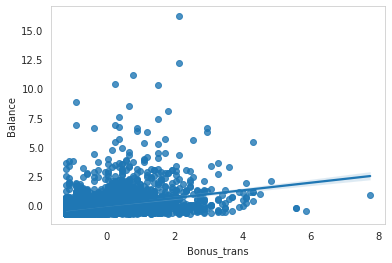

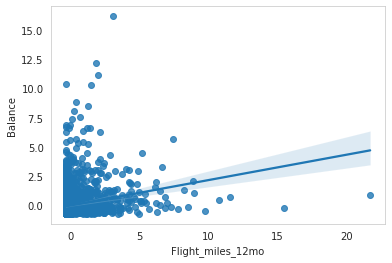

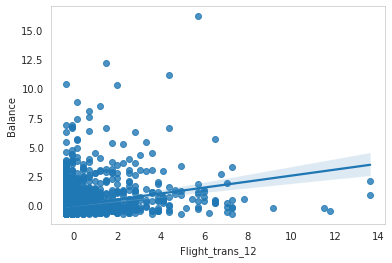

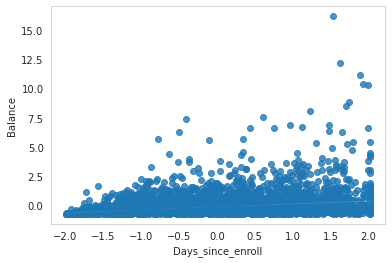

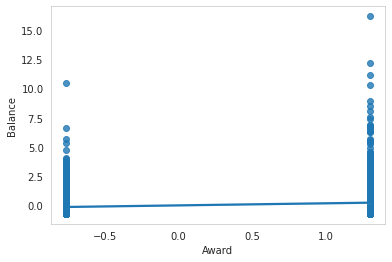

In [ ]:
import seaborn as sns
for X in scale_columns:
  sns.regplot(x=X, y="Balance", data=df1)
  plt.show()


**confusion matrix**

In [ ]:

from sklearn import metrics
cnf_matrix3=metrics.confusion_matrix(y_test,y3_pred)
cnf_matrix3
matrix3=metrics.classification_report(y_test,y3_pred)
matrix3

'              precision    recall  f1-score   support\n\n           0       0.71      0.86      0.78       864\n           1       0.66      0.45      0.53       536\n\n    accuracy                           0.70      1400\n   macro avg       0.69      0.65      0.66      1400\nweighted avg       0.69      0.70      0.68      1400\n'

Text(33.0, 0.5, 'actual outcomes')

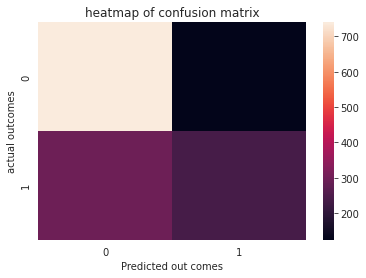

In [ ]:
sns.heatmap(cnf_matrix3)
plt.title("heatmap of confusion matrix")
plt.xlabel("Predicted out comes")
plt.ylabel("actual outcomes")

**measures of confusion matrix**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall', recall_score(y_test,y3_pred)*100)
print('f1', f1_score(y_test,y3_pred)*100)
print('accuracy', accuracy_score(y_test,y3_pred)*100)
print('precision', precision_score(y_test,y3_pred)*100)

recall 44.58955223880597
f1 53.17018909899889
accuracy 69.92857142857143
precision 65.84022038567493


**Decision Tree - Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)
y4_pred = clf.predict(X_test)
print('accuracy of the model is %:', accuracy_score(y_test, y4_pred)*100)

accuracy of the model is %: 74.35714285714286


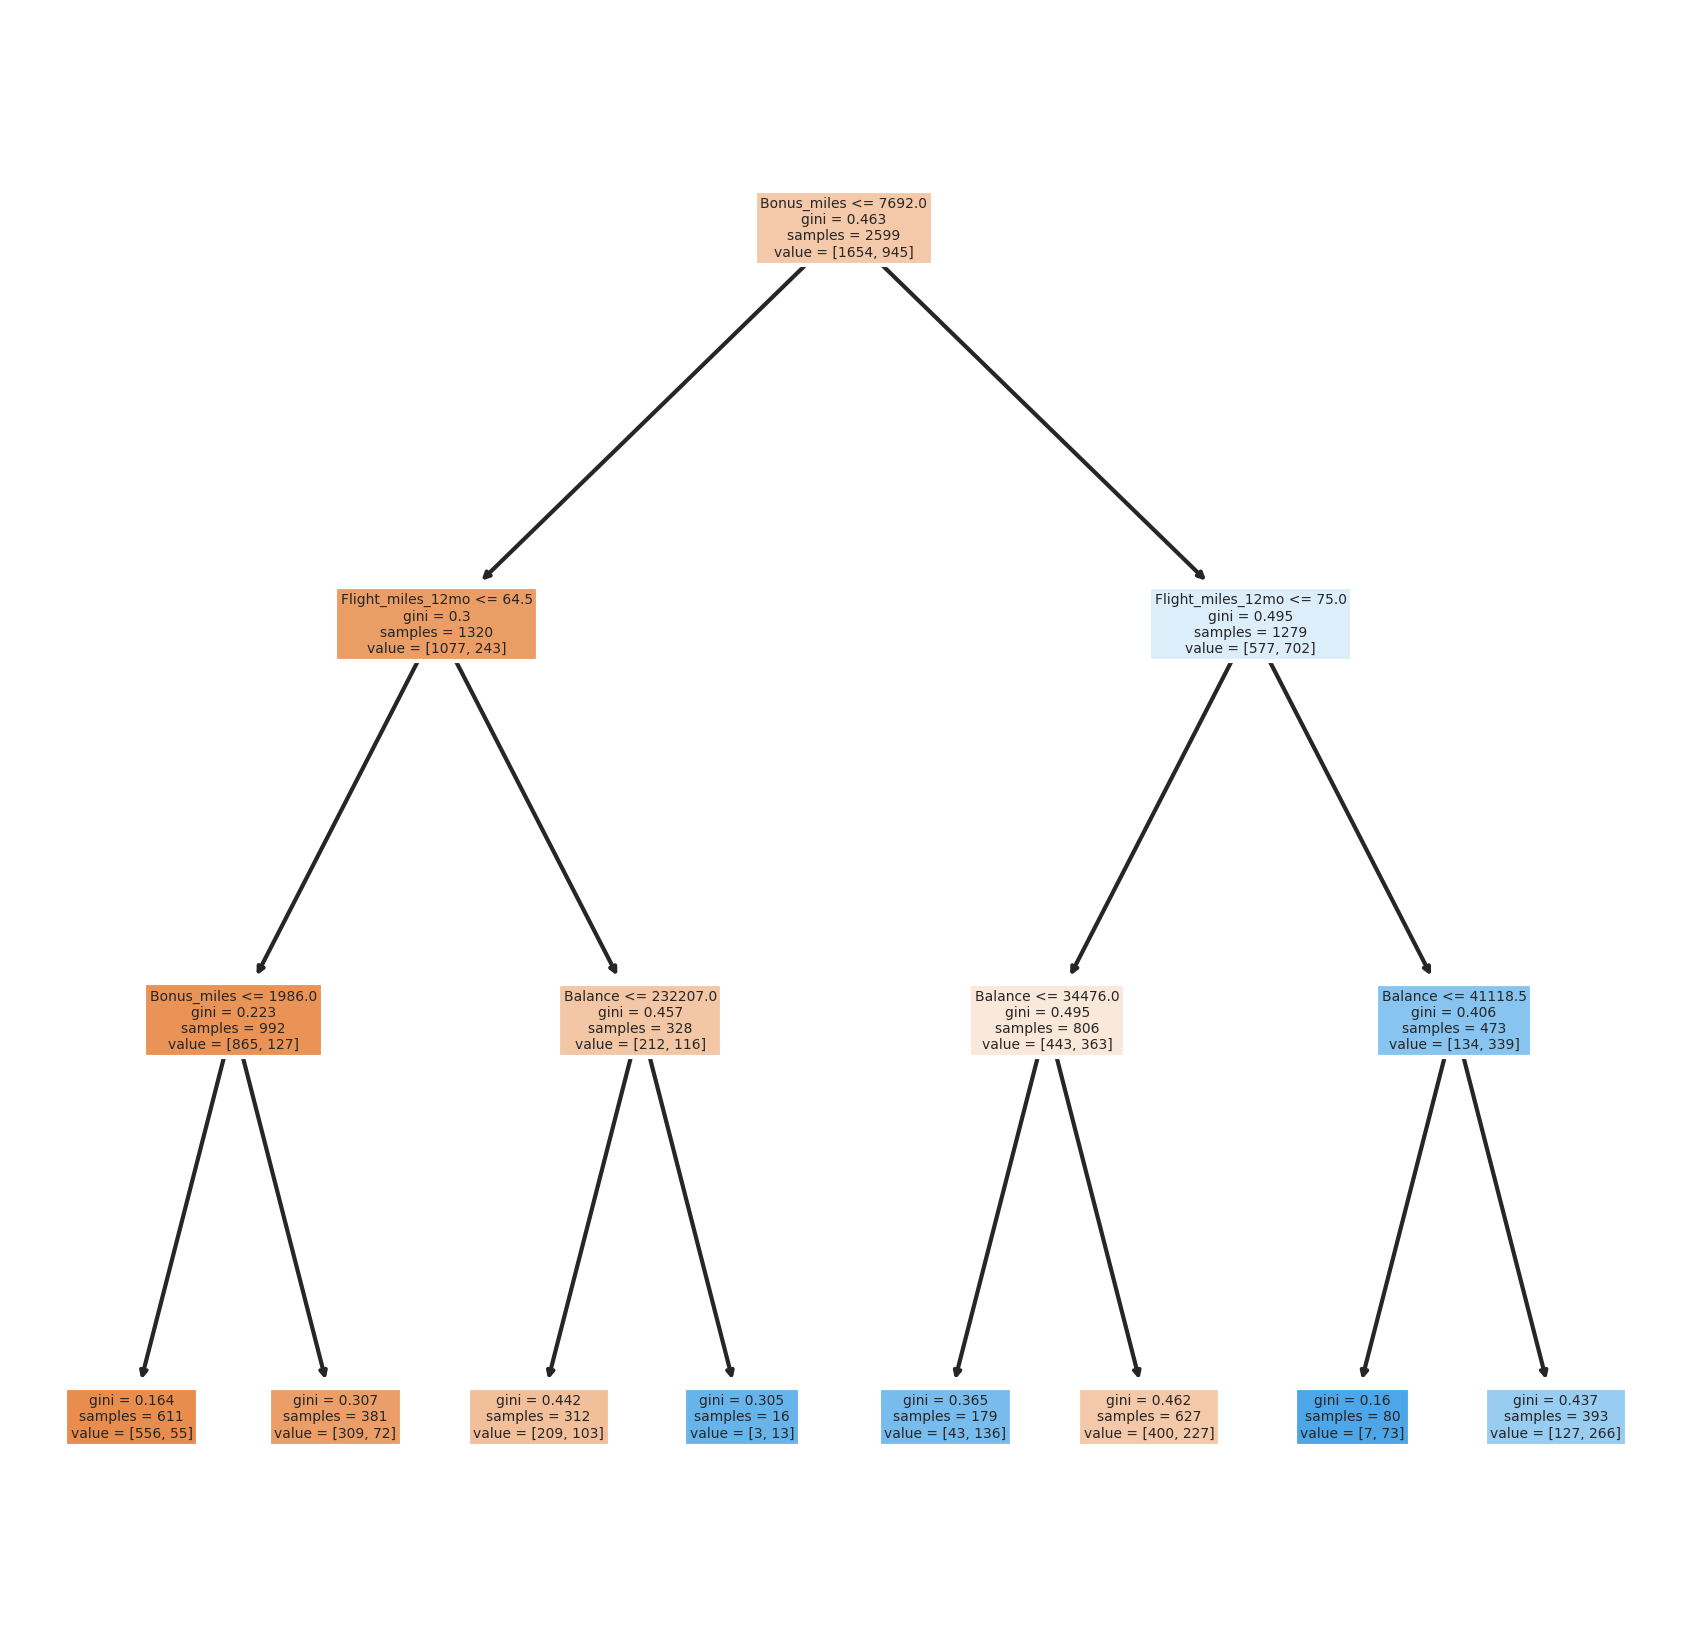

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
feature_cols = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll']
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)

tree.plot_tree(clf,feature_names = feature_cols, filled = True);

fig.savefig('Airline_Tree.png')

**confusion matrix**

In [ ]:
from sklearn import metrics
cnf_matrix4=metrics.confusion_matrix(y_test,y4_pred)
cnf_matrix4
matrix4=metrics.classification_report(y_test,y4_pred)
matrix4

'              precision    recall  f1-score   support\n\n           0       0.75      0.89      0.81       864\n           1       0.74      0.51      0.61       536\n\n    accuracy                           0.74      1400\n   macro avg       0.74      0.70      0.71      1400\nweighted avg       0.74      0.74      0.73      1400\n'

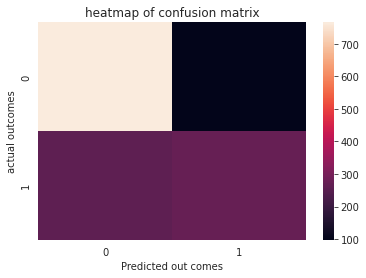

In [ ]:
sns.heatmap(cnf_matrix4)
plt.title("heatmap of confusion matrix")
plt.xlabel("Predicted out comes")
plt.ylabel("actual outcomes")
plt.show()

**measures of confusion matrix**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall', recall_score(y_test,y4_pred)*100)
print('f1', f1_score(y_test,y4_pred)*100)
print('accuracy', accuracy_score(y_test,y4_pred)*100)
print('precision', precision_score(y_test,y4_pred)*100)

recall 51.30597014925373
f1 60.506050605060516
accuracy 74.35714285714286
precision 73.7265415549598


**ROC AUC score(probablity predictions)**

In [ ]:
lr_probs = logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1 = lr_probs[:,1]
lr_1

[[0.67582937 0.32417063]
 [0.71385527 0.28614473]
 [0.65453423 0.34546577]
 ...
 [0.52988657 0.47011343]
 [0.7640337  0.2359663 ]
 [0.54032507 0.45967493]]


array([0.32417063, 0.28614473, 0.34546577, ..., 0.47011343, 0.2359663 ,
       0.45967493])

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,lr_1)
score

0.6790461753731344

**confusion matrix**

**ROC AUC score(probablity predictions)**

**Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train,y_train)
y5_pred =model1.predict(X_test)

print('accuracy of the model is %:', accuracy_score(y_test, y5_pred)*100)

accuracy of the model is %: 76.28571428571429


**confusion_matrix**

In [ ]:
from sklearn import metrics
cnf_matrix5=metrics.confusion_matrix(y_test,y5_pred)
cnf_matrix5
matrix5=metrics.classification_report(y_test,y5_pred)
matrix5

'              precision    recall  f1-score   support\n\n           0       0.78      0.86      0.82       864\n           1       0.73      0.60      0.66       536\n\n    accuracy                           0.76      1400\n   macro avg       0.75      0.73      0.74      1400\nweighted avg       0.76      0.76      0.76      1400\n'

Text(33.0, 0.5, 'actual outcomes')

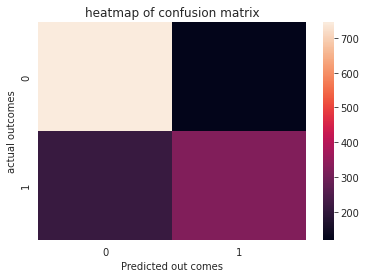

In [ ]:
sns.heatmap(cnf_matrix5)
plt.title("heatmap of confusion matrix")
plt.xlabel("Predicted out comes")
plt.ylabel("actual outcomes")

**measures of confusion matrix**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall', recall_score(y_test,y5_pred)*100)
print('f1', f1_score(y_test,y5_pred)*100)
print('accuracy', accuracy_score(y_test,y5_pred)*100)
print('precision', precision_score(y_test,y5_pred)*100)

recall 60.26119402985075
f1 66.05316973415131
accuracy 76.28571428571429
precision 73.07692307692307


**ROC AUC score(probablity predictions)**

In [ ]:
lr_probs = logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1 = lr_probs[:,1]
lr_1

[[0.67582937 0.32417063]
 [0.71385527 0.28614473]
 [0.65453423 0.34546577]
 ...
 [0.52988657 0.47011343]
 [0.7640337  0.2359663 ]
 [0.54032507 0.45967493]]


array([0.32417063, 0.28614473, 0.34546577, ..., 0.47011343, 0.2359663 ,
       0.45967493])

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,lr_1)
score

0.6790461753731344

**AdaBoostClassifier**

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
model2= AdaBoostClassifier()
model2.fit(X_train,y_train)
y6_pred =model2.predict(X_test)
print('accuracy of the model is %:', accuracy_score(y_test, y6_pred)*100)

accuracy of the model is %: 74.92857142857143


**confusion_matrix**

In [ ]:
from sklearn import metrics
cnf_matrix6=metrics.confusion_matrix(y_test,y6_pred)
cnf_matrix6
matrix6=metrics.classification_report(y_test,y6_pred)
cnf_matrix6
matrix6

'              precision    recall  f1-score   support\n\n           0       0.76      0.87      0.81       864\n           1       0.73      0.55      0.63       536\n\n    accuracy                           0.75      1400\n   macro avg       0.74      0.71      0.72      1400\nweighted avg       0.75      0.75      0.74      1400\n'

Text(33.0, 0.5, 'actual outcomes')

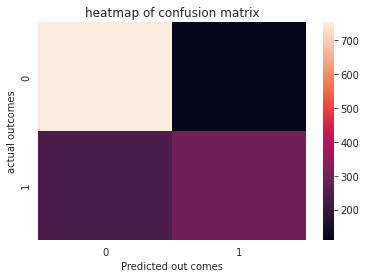

In [ ]:
sns.heatmap(cnf_matrix6)
plt.title("heatmap of confusion matrix")
plt.xlabel("Predicted out comes")
plt.ylabel("actual outcomes")

**measures of confusion matrix**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall', recall_score(y_test,y6_pred)*100)
print('f1', f1_score(y_test,y6_pred)*100)
print('accuracy', accuracy_score(y_test,y6_pred)*100)
print('precision', precision_score(y_test,y6_pred)*100)

recall 55.223880597014926
f1 62.778366914103934
accuracy 74.92857142857143
precision 72.72727272727273


**ROC AUC score(probablity predictions)**

In [ ]:
lr_probs = logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1 = lr_probs[:,1]
lr_1

[[0.67582937 0.32417063]
 [0.71385527 0.28614473]
 [0.65453423 0.34546577]
 ...
 [0.52988657 0.47011343]
 [0.7640337  0.2359663 ]
 [0.54032507 0.45967493]]


array([0.32417063, 0.28614473, 0.34546577, ..., 0.47011343, 0.2359663 ,
       0.45967493])

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,lr_1)
score

0.6790461753731344

**stacking classifier**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
knn=KNeighborsClassifier()
dtr= DecisionTreeClassifier()
ada= AdaBoostClassifier()
rfr=RandomForestClassifier()
lgr= LogisticRegression() 

In [ ]:
level0=[('knn',knn),('dtr',dtr),('ada',ada),('rfr',rfr)]

In [ ]:
model0 = StackingClassifier(estimators=level0, final_estimator=LogisticRegression())

In [ ]:
model0.fit(X_train,y_train)
y7_pred =model0.predict(X_test)
y7_pred
print('accuracy of the model is %:', accuracy_score(y_test, y7_pred)*100)

accuracy of the model is %: 77.92857142857143


**confusion_matrix**

In [ ]:
from sklearn import metrics
cnf_matrix7=metrics.confusion_matrix(y_test,y7_pred)
cnf_matrix7
#matrix7=metrics.classification_report(y_test,y7_pred)
#matrix7

array([[764, 100],
       [209, 327]])

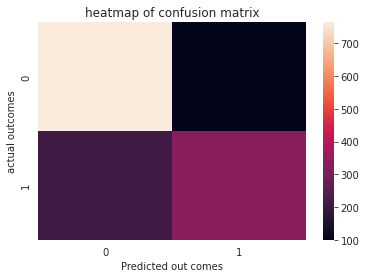

In [ ]:
sns.heatmap(cnf_matrix7)
plt.title("heatmap of confusion matrix")
plt.xlabel("Predicted out comes")
plt.ylabel("actual outcomes")
plt.show()

**Measures of confusion matrix**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('recall', recall_score(y_test,y7_pred)*100)
print('f1', f1_score(y_test,y7_pred)*100)
print('accuracy', accuracy_score(y_test,y7_pred)*100)
print('precision', precision_score(y_test,y7_pred)*100)

recall 61.00746268656716
f1 67.91277258566979
accuracy 77.92857142857143
precision 76.5807962529274


**ROC AUC score(probablity predictions)**

In [ ]:
lr_probs = logistic_regression.predict_proba(X_test)
print(lr_probs)
lr_1 = lr_probs[:,1]
lr_1

[[0.67582937 0.32417063]
 [0.71385527 0.28614473]
 [0.65453423 0.34546577]
 ...
 [0.52988657 0.47011343]
 [0.7640337  0.2359663 ]
 [0.54032507 0.45967493]]


array([0.32417063, 0.28614473, 0.34546577, ..., 0.47011343, 0.2359663 ,
       0.45967493])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,lr_1)
print("roc_auc_score:",roc_auc_score*100)

roc_auc_score: 67.90461753731344


In [ ]:
#roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


Awarded ROC AUC=0.500
Stacking ROC AUC=0.679


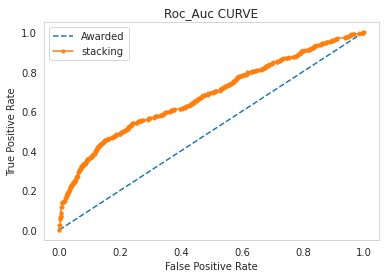

In [ ]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Awarded ROC AUC=%.3f' % (ns_auc))
print('Stacking ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Awarded')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='stacking')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Roc_Auc CURVE")
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**conclusion**

**KNeighborsClassifier accuracy of the model is %: 72.85142857142857**




**naive bayes algorithm accuracy of the model is %: 68.0**

**Decision Tree - Classification accuracy of the model is %: 74.35714285714286**

**random forest classifier accuracy of the model is %:76.28571428571429**

**AdaBoostClassifier accuracy of the model is %: 74.92857142857143**

**stacking classifier accuracy of the model is %: 77.78571428571428**

**From my observation of supervised learning ensemble technique of Stacking Classifier accuracy of the model is %: 77.78571428571428 so compare to other classifier model this is the best one.**

**Final conclusion**

I have applied EDA to analyze dataset.Discovered correlation between diff variables and found linearity.
Applied Standardazation transformation on the data to use Principle componets analysis effectively.
I have used & analyzed two clustering techniques here..i) DBSCAN & ii) HDBSCAN
By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the MinMaxScalr found less score so not used for further model building.


HDSCAN clustering given total cluster number=4, but when i comapred both DBSCAN& HDBSCAN clustering,